## A mini example from "Partial Least Square (PLS) methods for neuroimaging: A tutorial and review" by Krishnan, Williams, McIntosh, & Adbi (2011) NeuroImage

### Behavioral PLSC

In order to illustrate the various versions of PLS we have chosen a hypothetical neuroimaging experiment that analyze data from participants grouped into three experimental conditions comprising two clinical populations AD, PD, and age-matched normal control group. Each participant is scanned only once using PET imaging. Voxel activity values from the PET scans are collected seperately for each participant (X). The scans are coregistered to Talairach coordinates so that voxels are in the same location

Here, we have 3 participants per clinical category (hence a total of 9)

In [1]:
% The PET results are: (row: participants, column: voxel response) 

X1 = [2 5 6 1 9 1 7 6 2 1 7 3; ...  % AD 1
      4 1 5 8 8 7 2 8 6 4 8 2; ...  % AD 2
      5 8 7 3 7 1 7 4 5 1 4 3];     % AD 3

X2 = [3 3 7 6 1 1 10 2 2 1 7 4; ... % PD 1
      2 3 8 7 1 6 9 1 8 8 1 6; ...  % PD 2
      1 7 3 1 1 3 1 8 1 3 9 5];     % PD 3

X3 = [9 0 7 1 8 7 4 2 3 6 2 7; ...  % NC 1
      8 0 6 5 9 7 4 4 2 10 3 8; ... % NC 2
      7 7 4 5 7 6 7 6 5 4 8 8];     % NC 3
      
X = [X1; X2; X3]

X =

     2     5     6     1     9     1     7     6     2     1     7     3
     4     1     5     8     8     7     2     8     6     4     8     2
     5     8     7     3     7     1     7     4     5     1     4     3
     3     3     7     6     1     1    10     2     2     1     7     4
     2     3     8     7     1     6     9     1     8     8     1     6
     1     7     3     1     1     3     1     8     1     3     9     5
     9     0     7     1     8     7     4     2     3     6     2     7
     8     0     6     5     9     7     4     4     2    10     3     8
     7     7     4     5     7     6     7     6     5     4     8     8


Behavioral PLS correlation analyzes the relationship between the behavioral characteristics of groups and their functional brain activity Matrix X contains voxel activity, and Matrix Y vontains various demographic (e.g. age) and/or behavioral data. 

Here, participants underwent behavioral testing using a memory test for word recall. The behavioral measures were the number of words correctly recalled and the average reaction time (in ms).

In [2]:
% The behavioral data are: (row: the same participants, column: behavioral results) 

Y1 = [15 600; ... % AD 1, # correct, RT
      19 520; ... % AD 2
      18 545];    % AD 3

Y2 = [22 426; ... % PD 1
      21 404; ... % PD 2
      23 411];    % PD 3

Y3 = [29 326; ... % NC 1
      30 309; ... % NC 2
      30 303];    % NC 3

Y = [Y1; Y2; Y3]

Y =

    15   600
    19   520
    18   545
    22   426
    21   404
    23   411
    29   326
    30   309
    30   303


Both X and Y are centered and normalized within each condition (i.e. each X_n and Y_n is centered and normalized independently, and the sum of squares of a column in one condition is equal to 1. Note when all values are equal to their mean, they are all normalized to 0).

In [3]:
normMat = @(mat) ( zscore(mat) ./  sqrt(length(mat(:,1))-1) );

X = [normMat(X1); normMat(X2); normMat(X3)]
Y = [normMat(Y1); normMat(Y2); normMat(Y3)]

% This normalization gives the following matrices:

X =

   -0.7715    0.0671         0   -0.5883    0.7071   -0.4082    0.4082         0   -0.7926   -0.4082    0.2265    0.4082
    0.1543   -0.7383   -0.7071    0.7845         0    0.8165   -0.8165    0.7071    0.5661    0.8165    0.5661   -0.8165
    0.6172    0.6712    0.7071   -0.1961   -0.7071   -0.4082    0.4082   -0.7071    0.2265   -0.4082   -0.7926    0.4082
    0.7071   -0.4082    0.2673    0.2933         0   -0.6556    0.4778   -0.3113   -0.3113   -0.5883    0.2265   -0.7071
         0   -0.4082    0.5345    0.5133         0    0.7493    0.3345   -0.4981    0.8093    0.7845   -0.7926    0.7071
   -0.7071    0.8165   -0.8018   -0.8066         0   -0.0937   -0.8123    0.8093   -0.4981   -0.1961    0.5661         0
    0.7071   -0.4082    0.6172   -0.8165         0    0.4082   -0.4082   -0.7071   -0.1543   -0.1543   -0.5133   -0.8165
         0   -0.4082    0.1543    0.4082    0.7071    0.4082   -0.4082         0   -0.6172    0.7715   -0.2933    0.4082
   -0.7071    0.8165   -0.7

All the condition-wise matrices of correlations are stacked one on top of the other to form the combined matirx of correations R, which is the main input for the SVD. R matrix contains the correlation of each of the J voxels in X with each of the K behavioral measures in Y within each of the N conditions. Therefore, R will have N x K rows and J columns

In [24]:
% The matrix of correlations for each condition n is then computed as ...
% note that these are different to normMat(Y)' * normMat(X)

R1 = normMat(Y1)' * normMat(X1);
R2 = normMat(Y2)' * normMat(X2);
R3 = normMat(Y3)' * normMat(X3);

R = [R1; R2; R3]

[U, S, V] = svd(Y(:,1)' * X)
(Y(:,1)' * X) / 3.7913

R =

    0.8386   -0.3192   -0.2402    0.8660   -0.7206    0.6934   -0.6934    0.2402    1.0000    0.6934   -0.0385   -0.6934
   -0.7998    0.3827    0.3054   -0.8979    0.6719   -0.7406    0.7406   -0.3054   -0.9977   -0.7406   -0.0293    0.7406
   -0.5000    0.8660   -0.9449   -0.9333         0   -0.5960   -0.8109    0.9245   -0.9245   -0.6934    0.9608   -0.5000
    0.6673   -0.2055    0.0168    0.0507         0   -0.9486    0.3036   -0.0744   -0.6502   -0.9007    0.5627   -0.9787
   -0.8660    0.5000   -0.7559    1.0000         0   -0.5000    0.5000    0.8660    0.1890    0.1890    0.6286    1.0000
    0.9639   -0.7017    0.8963   -0.9679    0.2515    0.7017   -0.7017   -0.9639   -0.4298    0.0640   -0.8040   -0.9679


U =

     1


S =

    3.7913         0         0         0         0         0         0         0         0         0         0         0


V =

   -0.1391    0.2761   -0.5120    0.2460   -0.1901   -0.1062   -0.2649    0.5356    0.0698    0.0498    0.4091   -0.0510

Excerpt from https://www.ling.ohio-state.edu/~kbaker/pubs/Singular_Value_Decomposition_Tutorial.pdf (p.14)

SVD is used : (1) for transforming correlated variables into a set of uncorrelated ones that better expose the various relationships among the original data, (2) for identifying and ordering the dimensions along which data points exhibit the most variation, (3) once we have identified where the most variation is, it's possible to find the best approximation of the original data points using fewer dimensions.

... taking a high dimensional, highly variable set of data points and reducing it to a lower dimensional space that exposes the substructure of the original data more clearly and orders it from most variation to the least. 

In [5]:
% The SVD of R is computed as:
[U, S, V] = svd(R);

% where U is the N x K rows and L colum matrix of the saliences for the behavioral measures
% where L is the rank of R_behavior
% Behavioral saliences (i.e. U) indicate task-dependent differences in the
% brain-behavior correlation (i.e. the interaction of the experimental conditions
% with behavioral measures).
U

% where S is the diagonal matrix of singular values
% in decreasing order
S(1:6,1:6)

% where V is the J x L matrix of saliences for brain activity
% Brain saliences (i.e. V) indicate voxel-dependent differences in the brain behavior correlation.
V(:,1:6)

U =

   -0.4104    0.4176   -0.3706   -0.0191    0.1353   -0.7079
    0.4100   -0.4358    0.4023   -0.0038    0.1441   -0.6777
    0.4274   -0.2475   -0.7351    0.4636   -0.0144   -0.0243
    0.0700   -0.3076   -0.3958   -0.8590   -0.0770   -0.0064
    0.4449    0.4689    0.0618   -0.0928   -0.7393   -0.1524
   -0.5273   -0.5098    0.0050    0.1955   -0.6389   -0.1251


ans =

    3.8040         0         0         0         0         0
         0    3.2473         0         0         0         0
         0         0    2.4615         0         0         0
         0         0         0    1.6372         0         0
         0         0         0         0    0.3303         0
         0         0         0         0         0    0.0773


ans =

   -0.4555   -0.0863   -0.2348   -0.3355   -0.0653   -0.4186
    0.3249    0.0434   -0.1038    0.2438    0.2845   -0.5375
   -0.2597   -0.2513    0.3484   -0.1244    0.0306   -0.1432
   -0.0430    0.5946    0.0165   -0.4712   -0.3744   -0.1751
 

#### Somehow, the sign is reversed in U and V, so the L_X and L_Y also have inverse signs ... 


In [6]:
% from the saliences, we compute the latent variables L_X and L_Y

% brain scores:
L_X = X * V(:,1:6)


L_X =

    1.2313   -0.8950    0.4912    0.1331   -0.3023    0.3528
   -0.9015    1.3076   -1.2120    0.3072   -0.7752    0.8973
   -0.3298   -0.4126    0.7208   -0.4403    1.0775   -1.2501
   -0.2063   -0.6433   -0.3529   -1.4114   -0.0206    0.0001
   -1.0466    0.8900    1.4559    0.1690    0.0137    0.0013
    1.2529   -0.2467   -1.1030    1.2424    0.0069   -0.0014
   -1.3817   -1.2432   -0.1243    0.1240    0.1994    0.0096
   -0.3436    0.1104    0.5110    0.4247   -1.3578   -0.0640
    1.7253    1.1328   -0.3867   -0.5487    1.1584    0.0544


Behavior scores: its computation is slightly more complicated due to the block structure. The product the rows of Y and U corresponding to each experimental condition separately gives the latent variables for behavior score per condition. These condition-wise behavior scores are stacked to form the combined behavior scores.

In [7]:
% behavior scores

L_Y1 = Y(1:3,:) * U(1:2,:);
L_Y2 = Y(4:6,:) * U(3:4,:);
L_Y3 = Y(7:9,:) * U(5:6,:);
L_Y = [L_Y1; L_Y2; L_Y3]

L_Y =

    0.6440   -0.6699    0.6065    0.0122    0.0048    0.0342
   -0.4802    0.5000   -0.4531   -0.0086   -0.0106    0.0091
   -0.1638    0.1699   -0.1534   -0.0037    0.0057   -0.0432
    0.0543   -0.2387   -0.3071   -0.6665   -0.0597   -0.0049
   -0.3448    0.3621    0.7604    0.1946    0.0570    0.0210
    0.2905   -0.1234   -0.4534    0.4719    0.0027   -0.0161
   -0.7799   -0.7857   -0.0465    0.2302    0.0988    0.0256
    0.2962    0.3022    0.0242   -0.0804   -0.1630   -0.0350
    0.4837    0.4835    0.0224   -0.1499    0.0642    0.0095


The latent variables for brain activity (L_X) and behavior (L_Y) are not typically illustrated. However, PCA style plots show the effect of two latent variables at once. In this example, the PCA style plot of L_X shows the first brain scores (X-axis) separates AD1, PD3, and NC3 from the other participants, while the second brain scores (Y-axis) separates AD2, PD2, NC2, and NC3 from the other participants. 

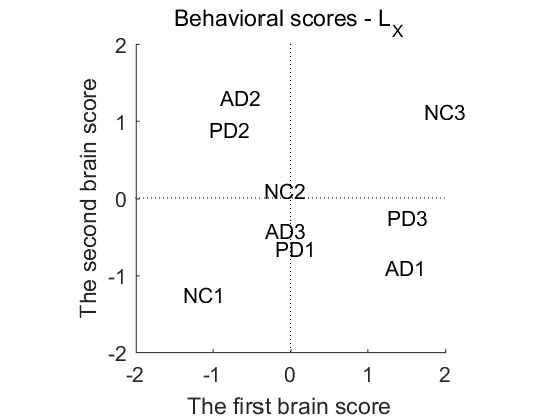

In [8]:
sbjLabel = {'AD1', 'AD2', 'AD3', 'PD1', 'PD2', 'PD3', 'NC1', 'NC2', 'NC3'};

figure; 
plot([-3 3], [0 0], 'k:'); hold on;
plot([0 0], [-3 3], 'k:');
for ii = 1:9
    text(L_X(ii,1), L_X(ii,2), sbjLabel{ii});
end

xlim([-2 2]);
ylim([-2 2]);

xlabel('The first brain score');
ylabel('The second brain score');
title('Behavioral scores - L_X');
axis square;
box off;


The PCA style plot of L_Y shows that the first behavior score (X-axis) separates NC1 from NC2 and NC3, while the second behavior score (Y-axis) separates AD1, PD2 and PD3 from AD2, AD3, and PD2.

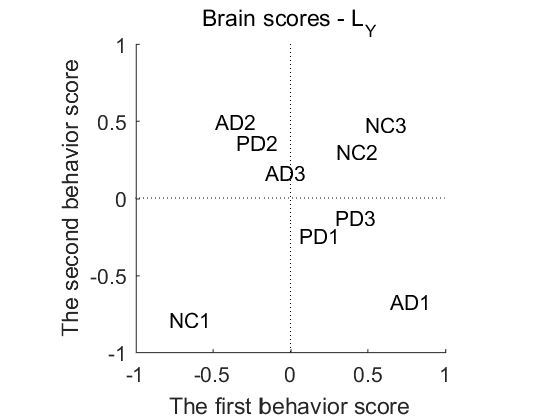

In [9]:
figure; 
plot([-3 3], [0 0], 'k:'); hold on;
plot([0 0], [-3 3], 'k:');
for ii = 1:9
    text(L_Y(ii,1), L_Y(ii,2), sbjLabel{ii});
end

xlim([-1 1]);
ylim([-1 1]);

xlabel('The first behavior score');
ylabel('The second behavior score');
title('Brain scores - L_Y');
axis square;
box off;

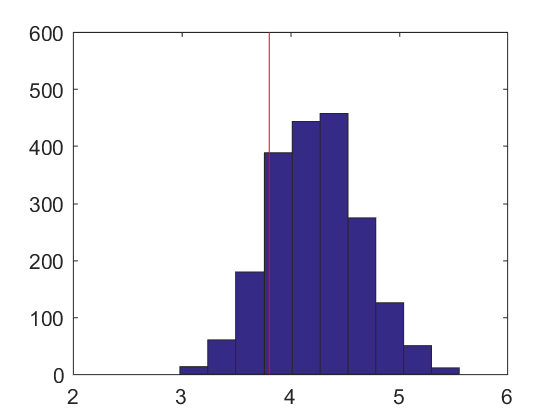

In [10]:
% making null distribution of singular values by permutation

numBoot = 2000;
nullSV = nan(numBoot,1);

orgX = [X1; X2; X3];

for ii = 1:numBoot
    permIdx = randperm(9);
    bootR = [normMat(Y1)' * normMat(orgX(permIdx(1:3),:)); ...
             normMat(Y2)' * normMat(orgX(permIdx(4:6),:)); ...
             normMat(Y3)' * normMat(orgX(permIdx(7:9),:))];
    [bU, bS] = svd(bootR);
    % only keep the largest S
    nullSV(ii) = bS(1,1);
end

figure; 
hist(nullSV); hold on;
plot(S(1,1)*[1 1], [0 600], 'r-');

### Mean-centered task PLSC

Mean-centered task PLSC is used when the I observations are structured into N groups or conditions. When using mean-centered task PLSC, the observations in X are arranaged according to these N experimental conditions and Y is a matrix of dummy coding that codes for the experimental groups or conditions.

In [11]:
% dummy coding for AD, PD & NC
Y_dc = [1 0 0; ... % AD1
        1 0 0; ... % AD2
        1 0 0; ... % AD3
        ...
        0 1 0; ... % PD1
        0 1 0; ... % PD2
        0 1 0; ... % PD3
        ...
        0 0 1; ... % NC1
        0 0 1; ... % NC2
        0 0 1]     % NC3

Y_dc =

     1     0     0
     1     0     0
     1     0     0
     0     1     0
     0     1     0
     0     1     0
     0     0     1
     0     0     1
     0     0     1


In [12]:
% The average for each condition is then computed and stored in an N x J matrix, denoted M, which is computed as:

M = [mean(X1); mean(X2); mean(X3)]


M =

    3.6667    4.6667    6.0000    4.0000    8.0000    3.0000    5.3333    6.0000    4.3333    2.0000    6.3333    2.6667
    2.0000    4.3333    6.0000    4.6667    1.0000    3.3333    6.6667    3.6667    3.6667    4.0000    5.6667    5.0000
    8.0000    2.3333    5.6667    3.6667    8.0000    6.6667    5.0000    4.0000    3.3333    6.6667    4.3333    7.6667


In [13]:
% Each column of matrix M is then mean-centered

R_mc = M - repmat(mean(M), 3, 1)

R_mc =

   -0.8889    0.8889    0.1111   -0.1111    2.3333   -1.3333   -0.3333    1.4444    0.5556   -2.2222    0.8889   -2.4444
   -2.5556    0.5556    0.1111    0.5556   -4.6667   -1.0000    1.0000   -0.8889   -0.1111   -0.2222    0.2222   -0.1111
    3.4444   -1.4444   -0.2222   -0.4444    2.3333    2.3333   -0.6667   -0.5556   -0.4444    2.4444   -1.1111    2.5556


In [14]:
% SVD of the mean-centered R gives
[U, S, V] = svd(R_mc);

U
S(:,1:3)
V(:,1:3)

U =

   -0.1992    0.7918    0.5774
   -0.5861   -0.5684    0.5774
    0.7853   -0.2234    0.5774


ans =

    7.8637         0         0
         0    5.7296         0
         0         0    0.0000


ans =

    0.5570   -0.0036   -0.2373
   -0.2082    0.1240   -0.5823
   -0.0333    0.0130   -0.1918
   -0.0830   -0.0531   -0.2924
    0.5218    0.6945   -0.0809
    0.3413   -0.1760    0.2088
   -0.1327   -0.1193   -0.2096
   -0.0258    0.3095    0.2413
   -0.0502    0.1051   -0.2576
    0.3170   -0.3804   -0.1662
   -0.1500    0.1441    0.4701
    0.3254   -0.4264    0.1227


In [15]:
% brain scores:
L_X = [X1; X2; X3] * V(:,1:2)
zLX = zscore(L_X)

L_X =

    3.8864    7.2933
    7.6983    5.7196
    4.0413    5.4365
    0.2683   -0.7890
    4.9292   -5.6452
    1.3009    1.5023
   14.4073   -0.1927
   15.5153   -1.0102
    8.9304    2.2020


zLX =

   -0.5368    1.3947
    0.1715    1.0083
   -0.5080    0.9388
   -1.2092   -0.5898
   -0.3431   -1.7821
   -1.0173   -0.0272
    1.4182   -0.4433
    1.6241   -0.6441
    0.4005    0.1446


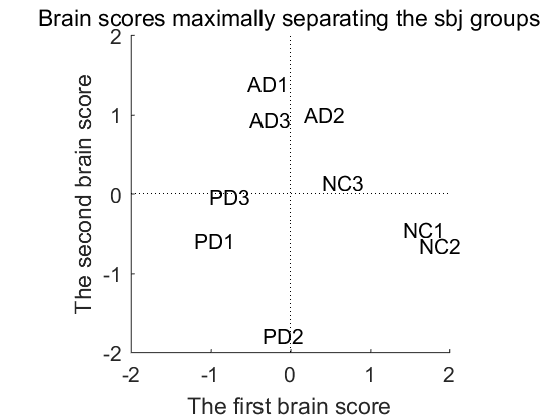

In [16]:
figure; 
plot([-3 3], [0 0], 'k:'); hold on;
plot([0 0], [-3 3], 'k:');
for ii = 1:9
    text(zLX(ii,1), zLX(ii,2), sbjLabel{ii});
end

xlim([-1 1]*2);
ylim([-1 1]*2);

xlabel('The first brain score');
ylabel('The second brain score');
title('Brain scores maximally separating the sbj groups');
axis square;
box off;
